<a href="https://colab.research.google.com/github/Bhoomikadayal/Capstone-4-Unsupervised-ML/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name** - **NETFLIX MOVIES AND TV SHOWS CLUSTERING** - Unsupervised ML Capstone Project

##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Team Name** - Bhoomika Dayal
##### **Name** - Bhoomika Dayal

# **GitHub Link -**

Bhoomika Dayal - https://github.com/Bhoomikadayal/Capstone-4-Unsupervised-ML/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb

# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

NETFLIX.avif

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

Steps that are performed:

* Importing libraries
* Loading the dataset
* Shape of dataset
* Dataset information
* Handling the duplicate values
* Handling missing values.
* Undeerstanding the columns
* Variable description
* Data wrangling
* Data visualization
* Story telling and experimenting with charts.
* Text preprocessing,
* Latent Direchlet Allocation
* Sentiment analysis
* Challenges faced
* Conclusion.

# **Business Problem**

1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features

## <b> Data Description </b>

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# ***Let's Begin !***

## ***1. Know Your Data***
### Dataset Loading from google drive and Import Libraries

In [1]:
# mount the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the data set from drive
df = pd.read_csv('/content/drive/MyDrive/capstone project - 4 (unsupervised)/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [6]:
# Shape of data.

print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 7787 rows and 12 columns.


### Dataset Rows & Columns count
it tells us that there is 7787 rows and 12 columns in that dataset

In [7]:
df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

# **Preprocessing the dataset**

* Deal with null/missing values
* Deal with duplicate data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
# dataset duplicate value count
a = df.duplicated().sum()
print(f"the duplicates values in data is {a}")

the duplicates values in data is 0


In [10]:
# checking null value
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
df.isnull().sum().sum()

3631

* We found that there is no duplicates values in that data set.There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column ,10 in date_added and 7 in rating.
* Every row of information we have relates to a specific movie. Therefore, we are unable to use any method to impute any null values. Additionally, due to the small size of the data.
* we will handle Null values after EDA.

## ***Understanding Your Variables***

In [12]:
# Dataset columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Description of data. (i.e statistical values)

df.describe().T

count        mean       std     min     25%     50%     75%  \
release_year  7787.0  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0   

                 max  
release_year  2021.0

# **Exploratory Data Analysis Of The Data Set**

**Why do we perform EDA?**
* ***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Type

In [14]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

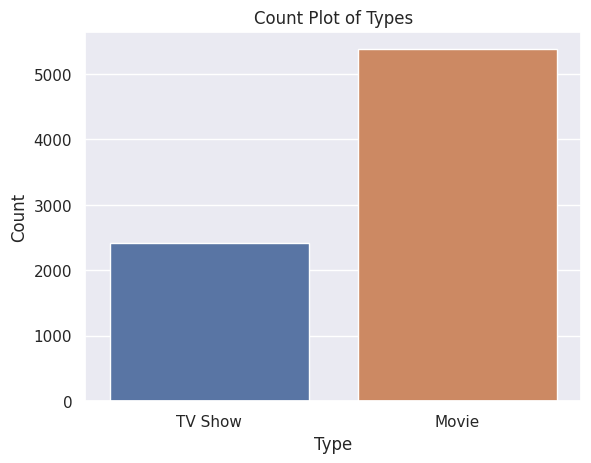

In [15]:
sns.set(style="darkgrid")
sns.countplot(data=df, x='type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count Plot of Types')
plt.show()

Conclusion
* Netflix has 5377 movies and 2410 TV shows, there are more number movies on Netflix than TV shows.

#### Chart - 2 - Rating

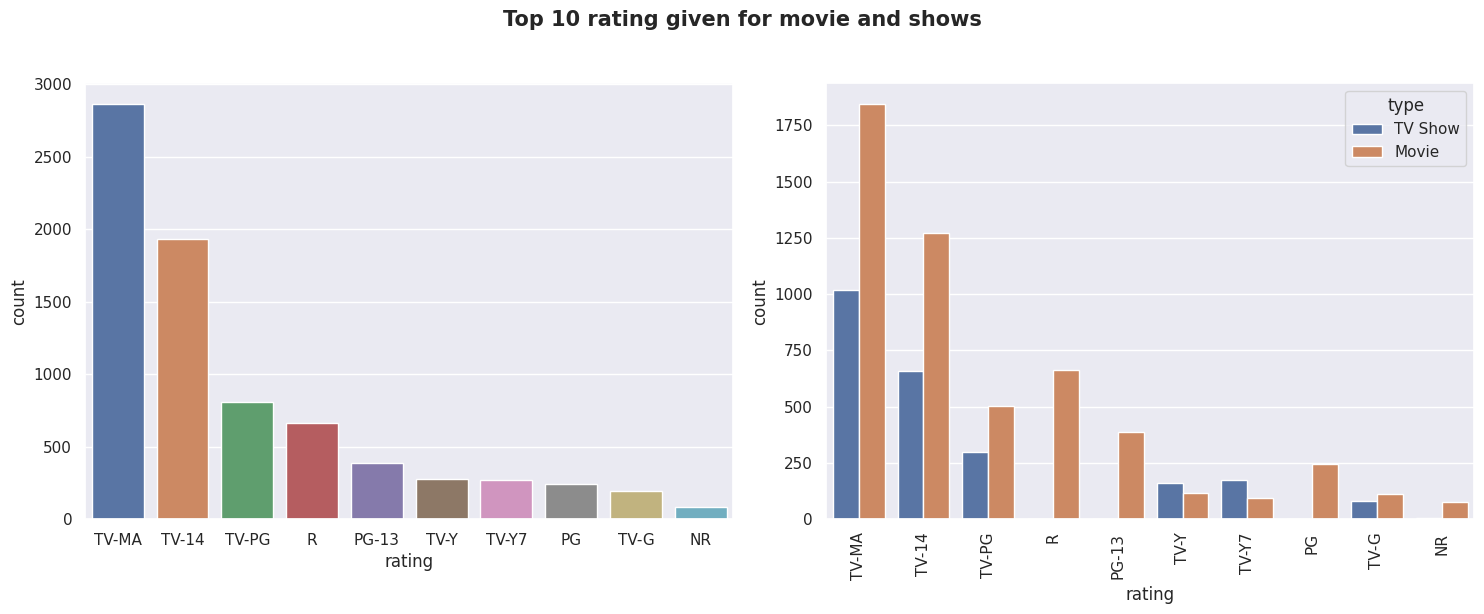

In [16]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Conclusion:
* The majority of Movies and TV shows have a rating of TV-MA, which stands for "Mature Audience," followed by TV-14, which stands for "Younger Audience."
* When compared to TV shows, Movies receive the highest rating, which is pretty obvious given that a number of Movies are higher compared to TV shows, as we saw earlier in the type column.

#### Chart - 3 - Release year

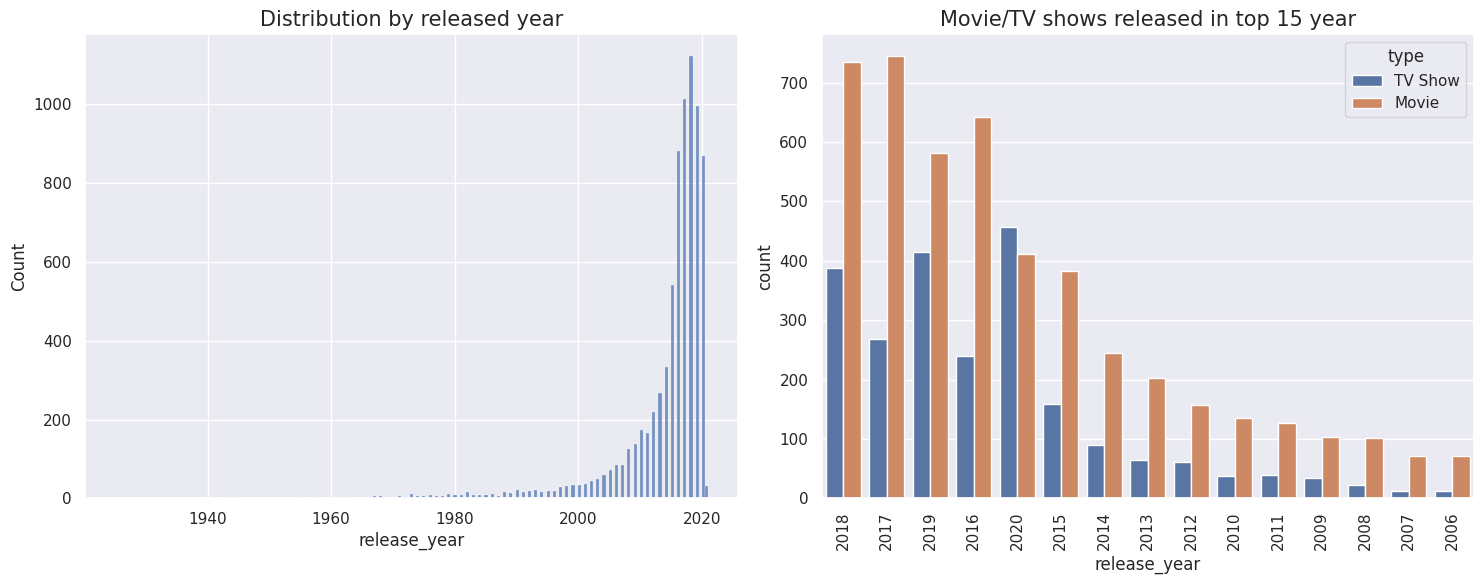

In [17]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.histplot(df['release_year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Conclusion:
* Netflix starts releasing more Movies/TV shows in recent years compared to old ones.
* Most Movies and TV shows are available on Netflix between 2015 and 2020, and the highest are in 2018.

#### Chart - 4 - Director

In [18]:
print(f"Number of Movies directed by directors are : {df[df['type']=='TV Show']['director'].value_counts().sum()}")
print(f"Number of TV shows directed by directors are : {df[df['type']=='Movie']['director'].value_counts().sum()}")

Number of Movies directed by directors are : 184
Number of TV shows directed by directors are : 5214


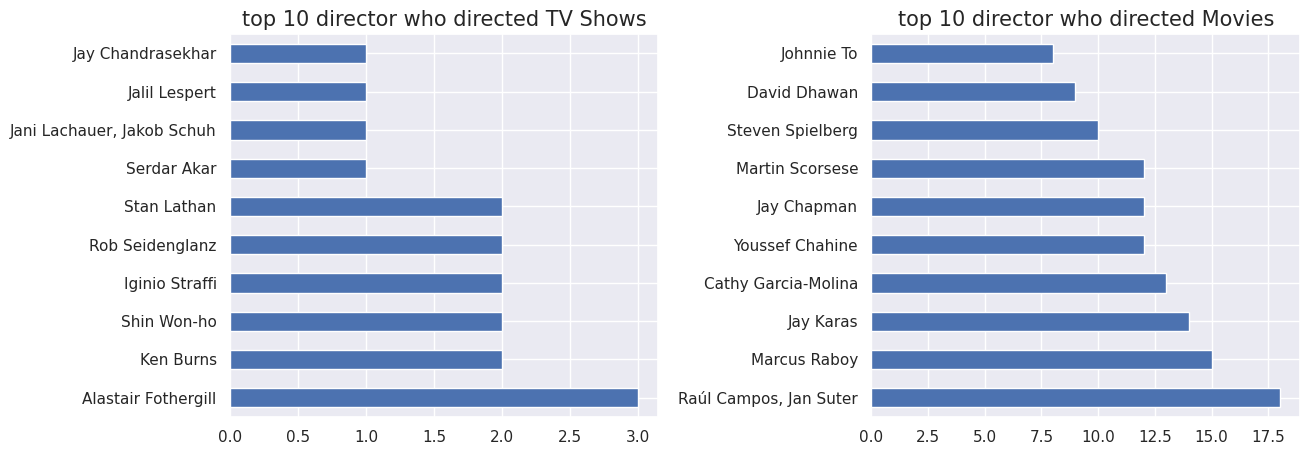

In [19]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 directors who directed TV shows
tv_shows = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
tv_shows.set_title('top 10 director who directed TV Shows', size=15)

# top 10 directors who directed Movies
movies = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('top 10 director who directed Movies', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

Conclusion:
* The three shows directed by Alastair Fothergill are the highest on the data list.
* Both, Jan Suter and Raul Campos have directed 18 films, more than anyone else in the dataset.




#### Chart - 5 - Cast

In [20]:
print(f"Number of TV Shows actors: {len(df[df['type']=='TV Show']['cast'].str.split(', ',expand=True).stack().value_counts())}")
print(f"Number of Movies actors: {len(df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().value_counts())}")

Number of TV Shows actors: 13585
Number of Movies actors: 23049


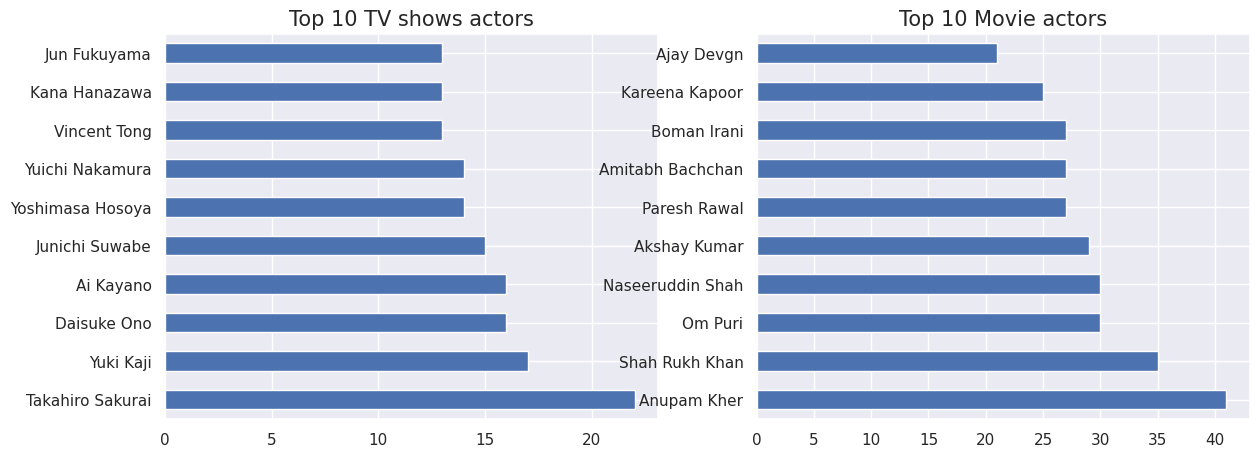

In [21]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)
plt.show()

Conclusion:
* The majority of the roles in the movies are played by Anupam Kher, Shahrukh Khan, and Om Puri.
*In the shows, Takahiro Sakurai, Yuki Kaji, and Daisuke Ono played the most number of roles.

#### Chart - 6 - Country

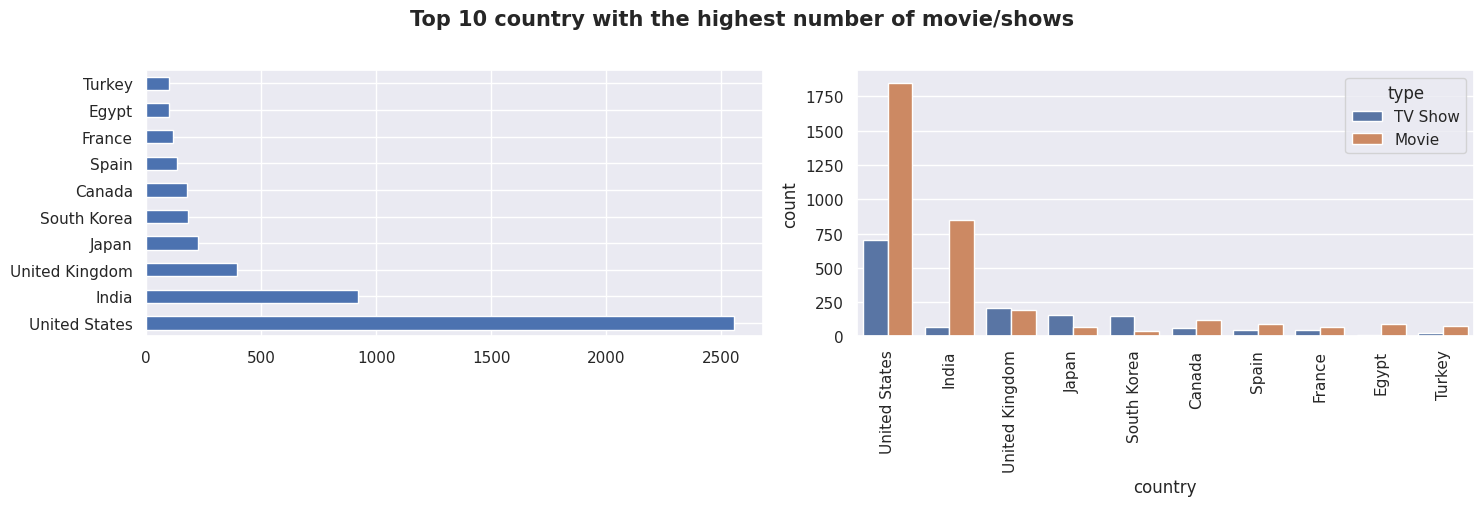

In [22]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Top 10 country with the highest number of movie/shows', weight='bold', size=15, y=1.01)

# univariate analysis
df['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="country", data=df, hue='type', order=df['country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Conclusion:
* The United States-based movies and TV shows were produced most, followed by India and the United Kingdom.
* In India and United State, a greater number of movies are present compared to TV shows.
* In the UK, Japan, and South Korea there are a greater number of TV shows than movies.

#### Chart - 7 - listed_in

In [23]:
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()


genre  count
0    International Movies   2437
1                  Dramas   2106
2                Comedies   1471
3  International TV Shows   1199
4           Documentaries    786

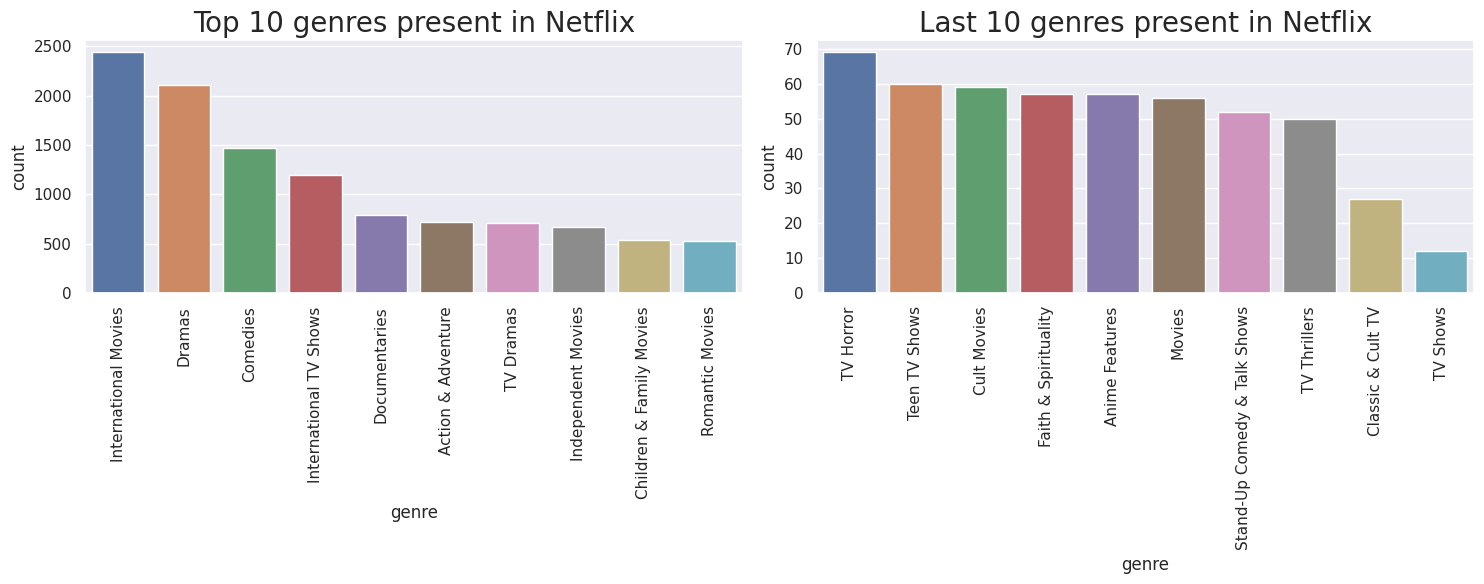

In [24]:
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Top 10 genres
top = sns.barplot(x='genre', y = 'count', data=genres[:10], ax=ax[0])
top.set_title('Top 10 genres present in Netflix', size=20)
plt.setp(top.get_xticklabels(), rotation=90)

# Last 10 genres
bottom = sns.barplot(x='genre', y = 'count', data=genres[-10:], ax=ax[1])
bottom.set_title('Last 10 genres present in Netflix', size=20)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Conclusion:
* International Movies, Dramas, and Comedies make up the majority of the genres.
TV Shows, Classic and cult TV, TV thrillers, Stand-Up comedy, and Talk shows account for the least genres.

#### Chart - 8 - Title

In [25]:
# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

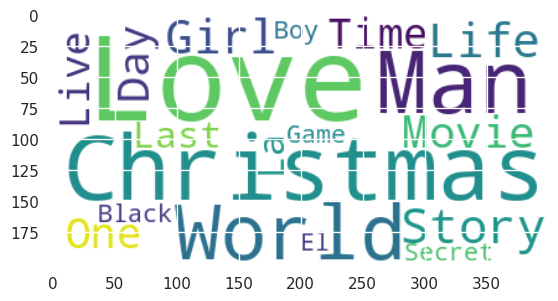

In [26]:
# text documents
text = " ".join(word for word in df['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()


Conclusion:
* Words like 'Love', 'Christmas', 'Man', 'World', 'Life', 'Girl', and 'Story' are frequently used in the movie title column.

#### Chart - 9 - description

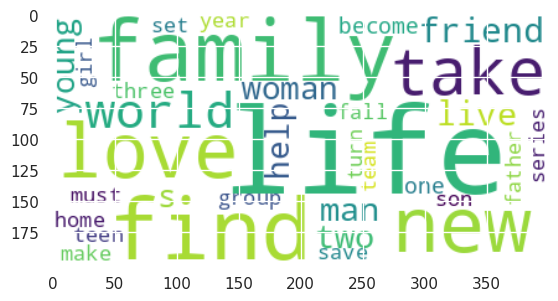

In [27]:
# text documents
text = " ".join(word for word in df['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

Conclusion:
* The most frequently used words in the description column are "family," "find," "life," "love," "new world," and "friend."

#Popular Genres for Different Countries

In [28]:
# defined fenstion to find the most popular genres for some of the countries

def genre_country(country_name):
  df = data[data['country'].str.contains(country_name)]
  l1={}
  for ele in df['listed_in']:
    for el in ele.split(','):
      if el in l1.keys():
        l1[el]= l1[el] + 1
      else:
        l1[el] = 1
  l1 = dict(Counter(l1).most_common(5))
  plt.bar(range(len(l1)), list(l1.values()), align='center', color=['skyblue', 'blue', 'green', 'black', 'cyan', 'pink'])
  plt.xticks(range(len(l1)), list(l1.keys()),rotation = 'vertical')
  plt.title("Most popular Genres for "+country_name)
  plt.show()


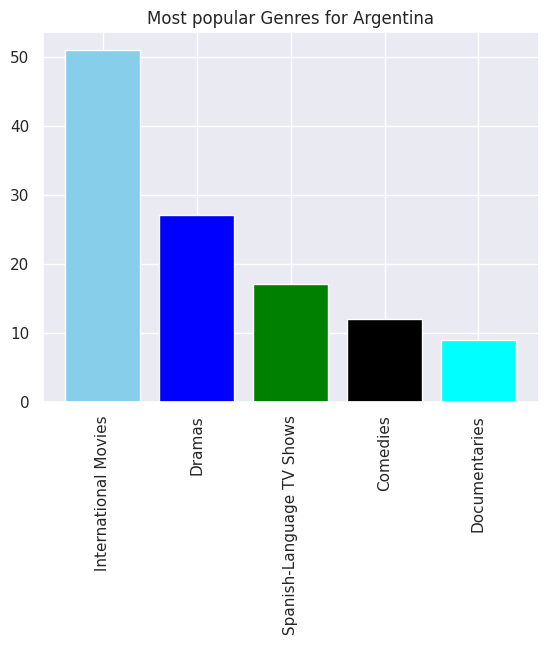

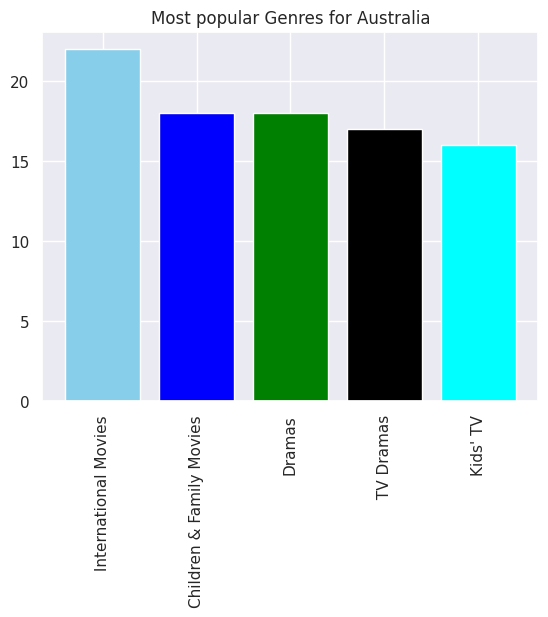

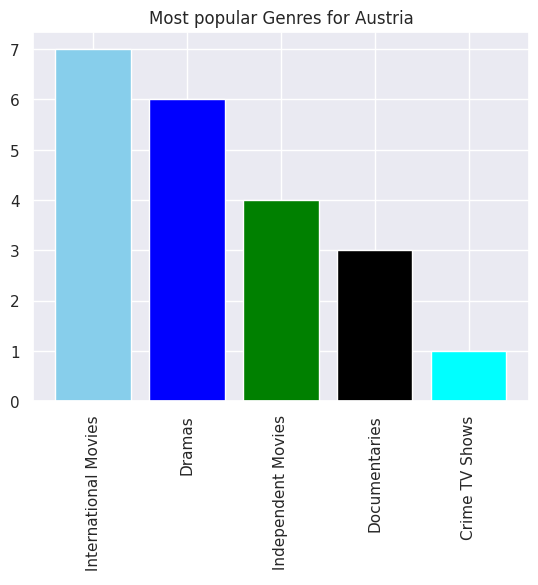

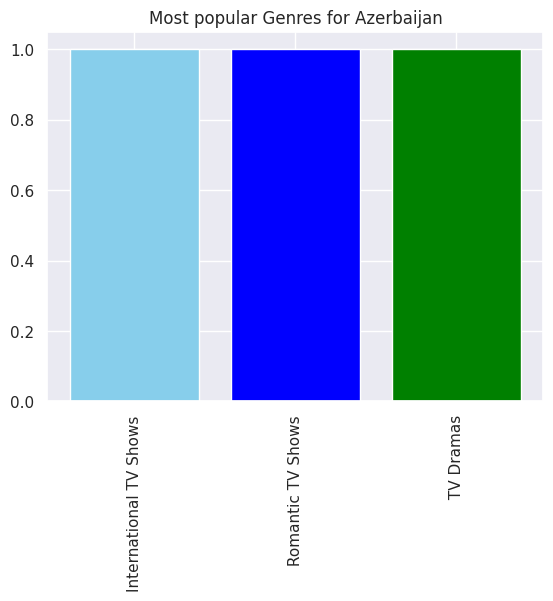

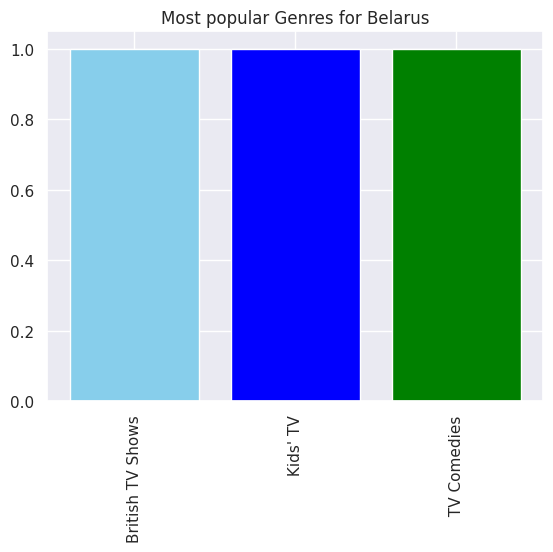

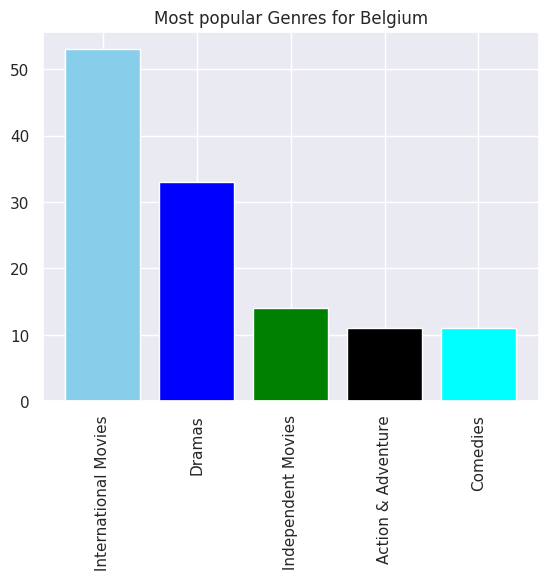

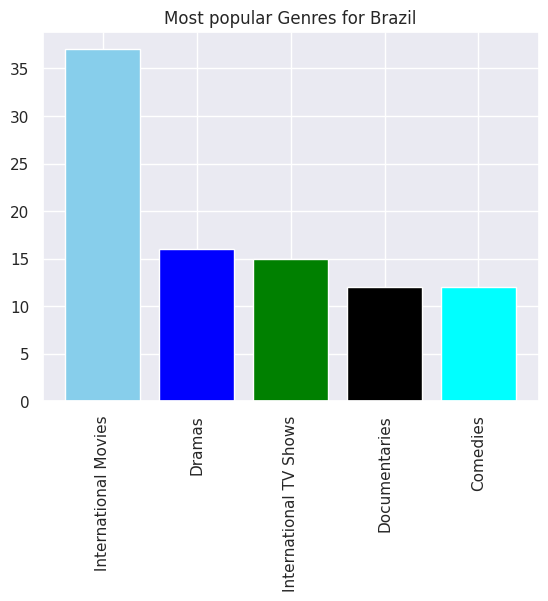

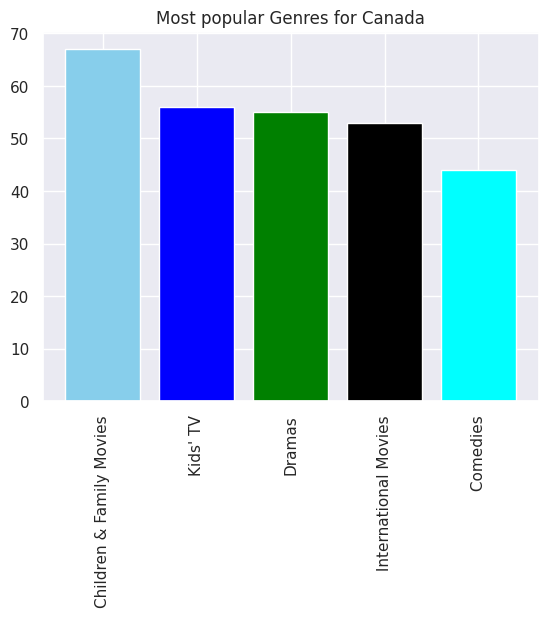

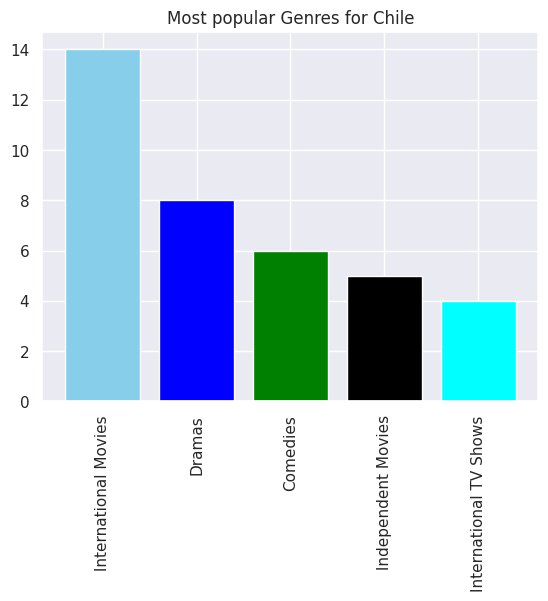

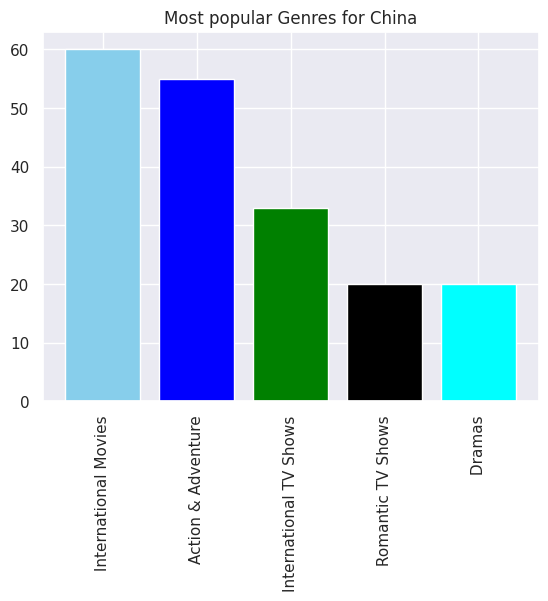

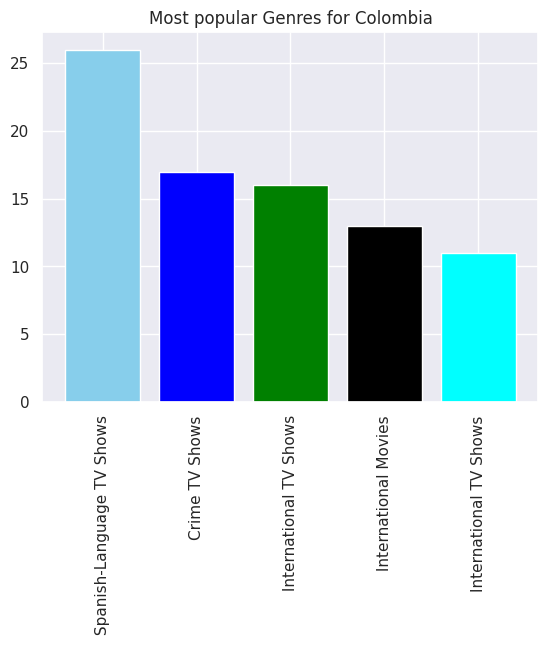

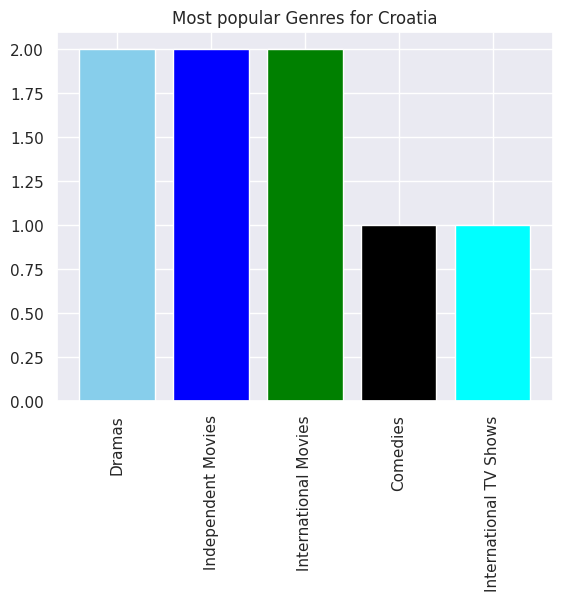

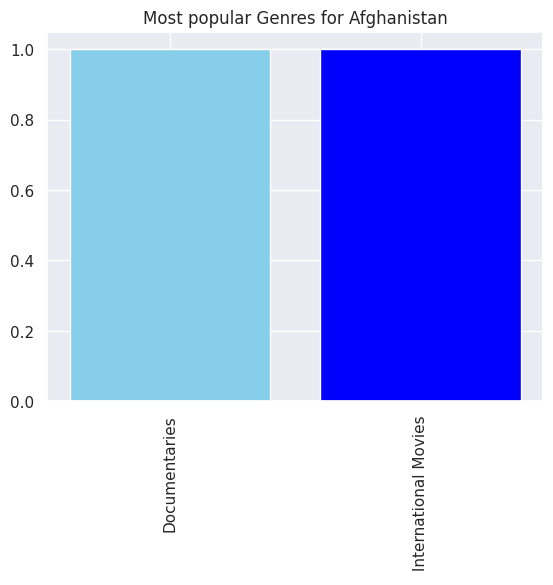

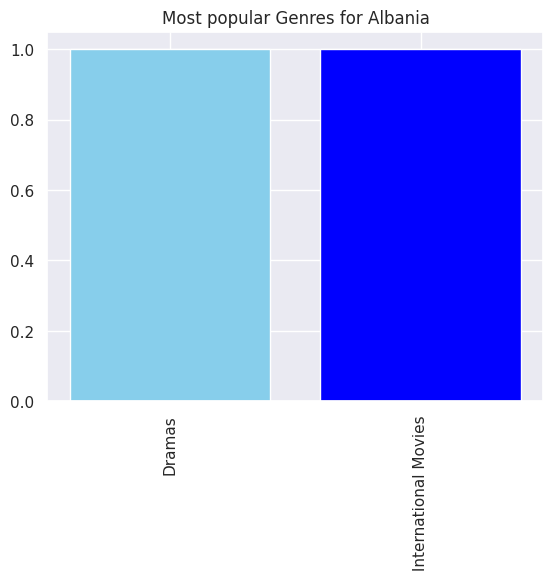

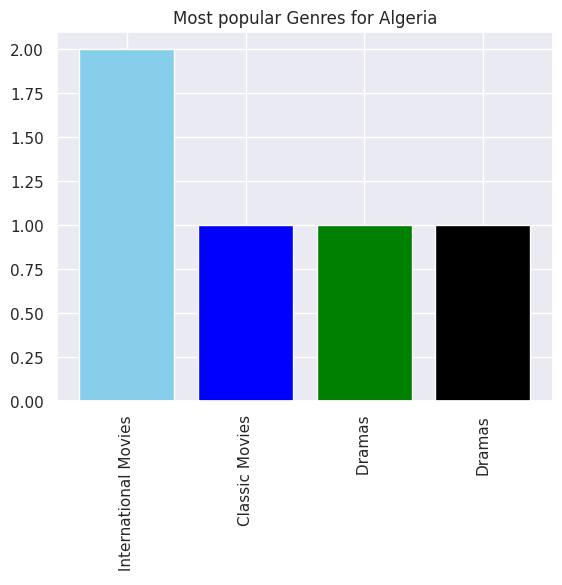

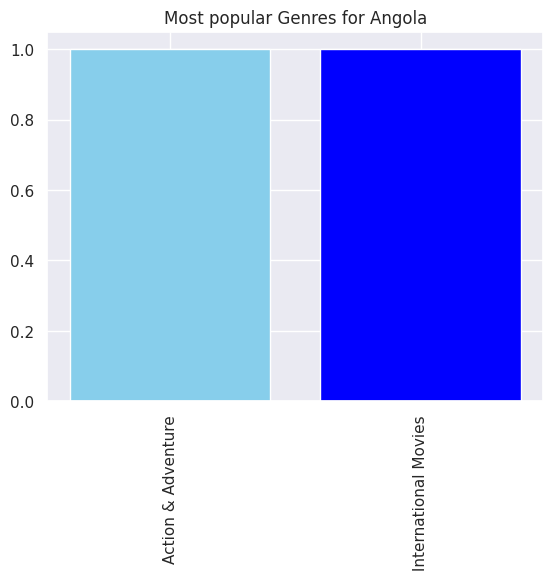

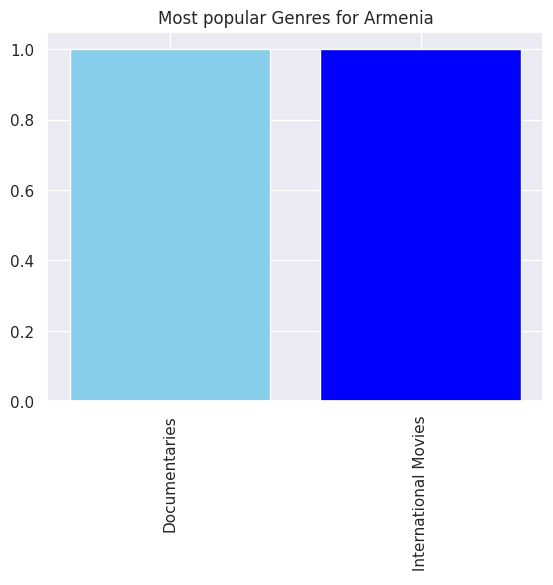

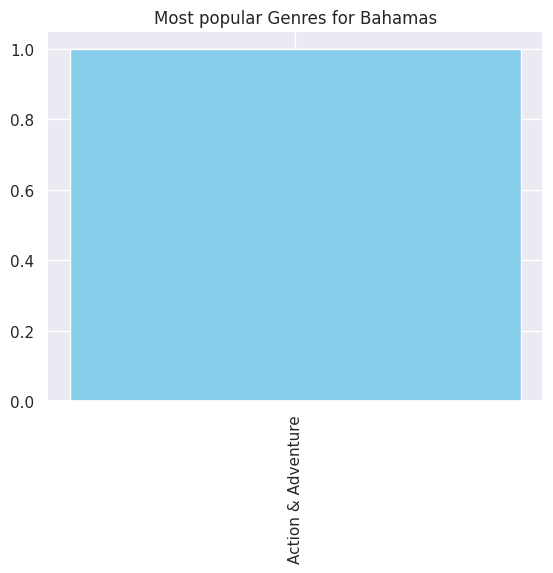

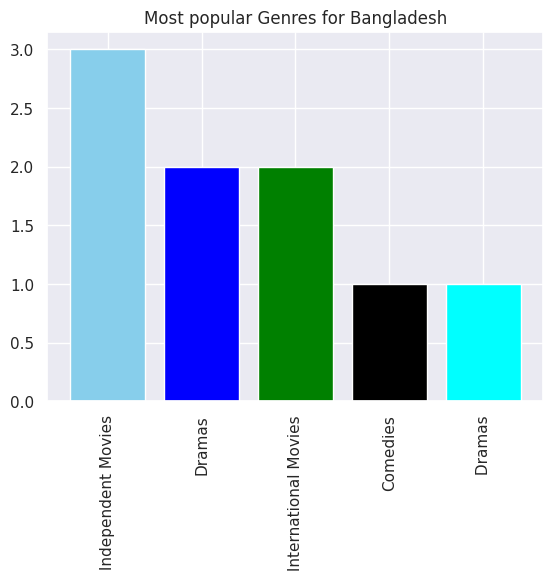

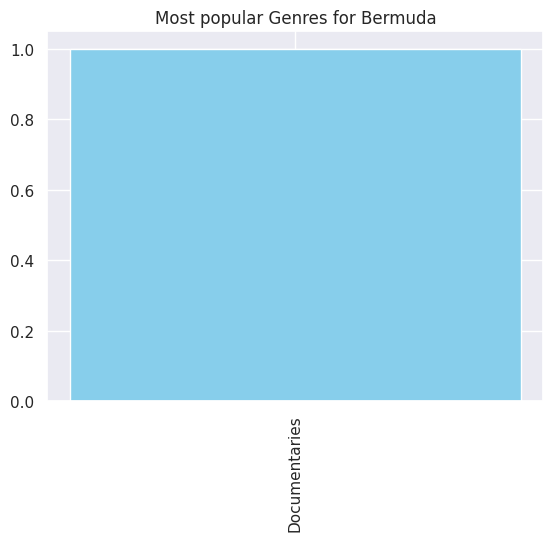

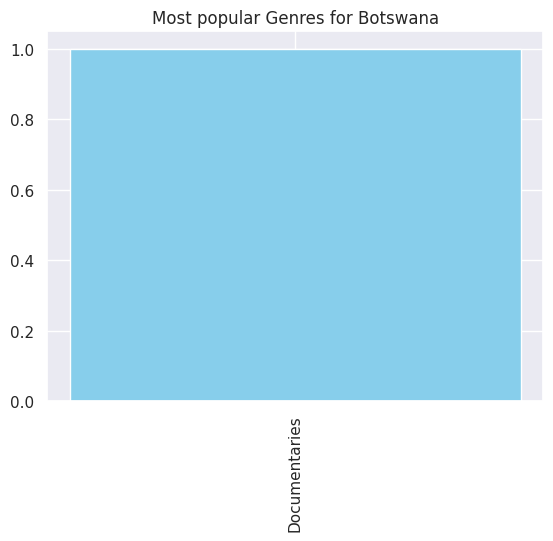

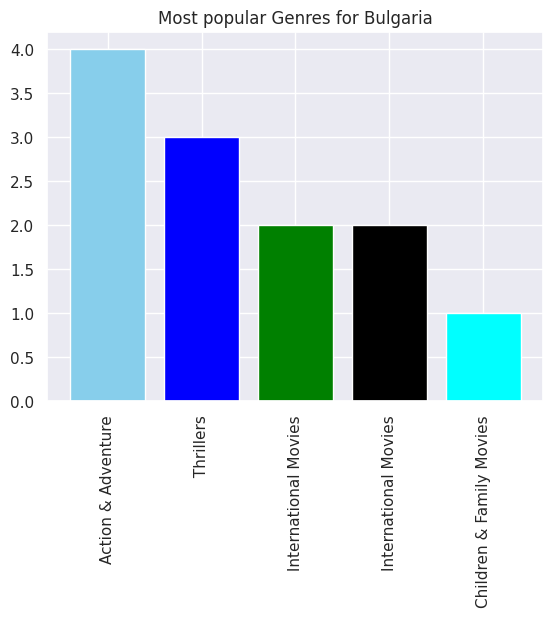

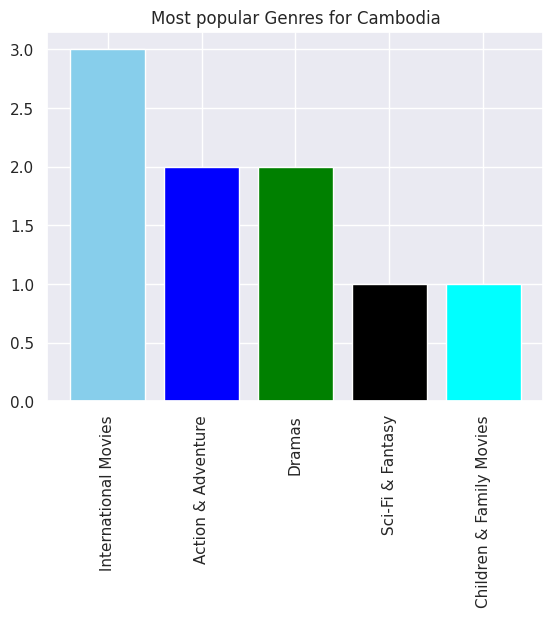

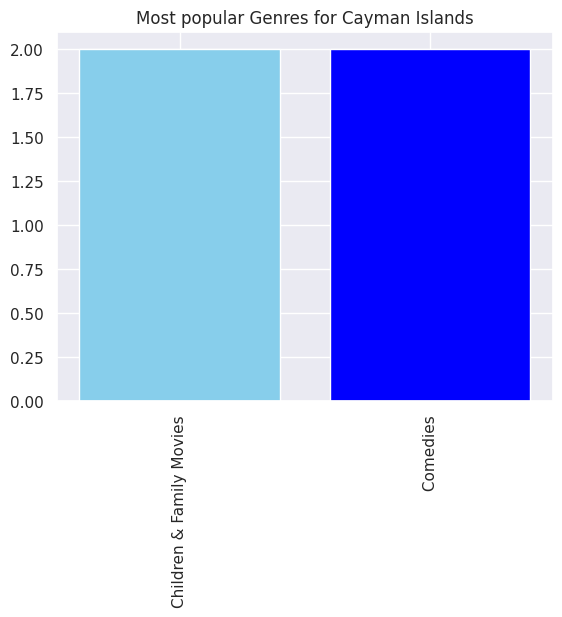

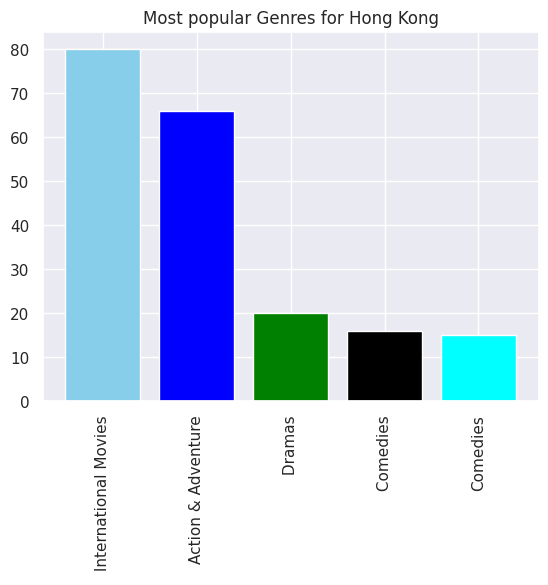

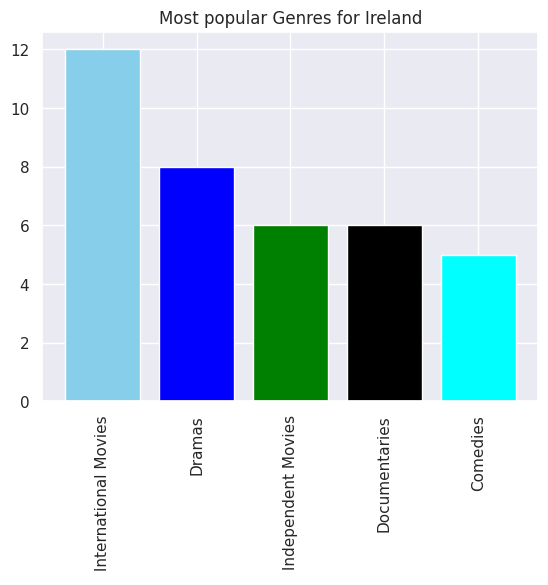

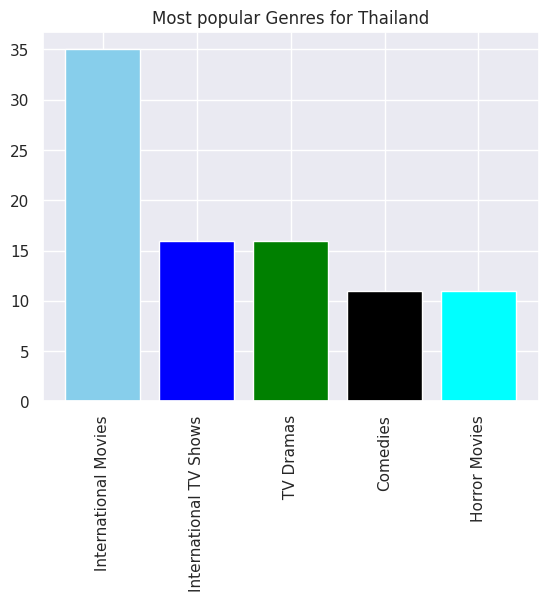

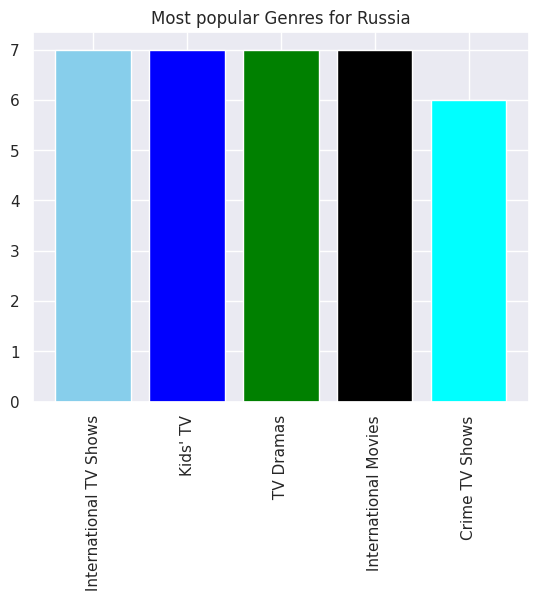

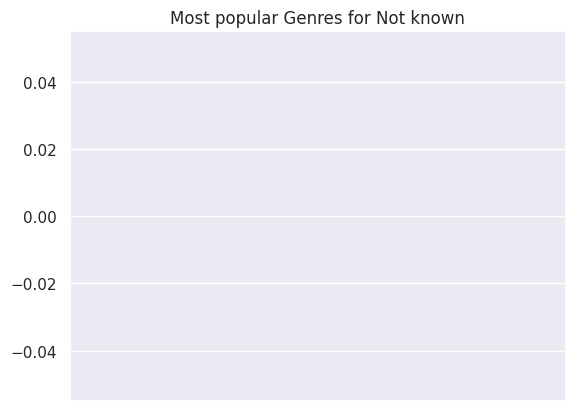

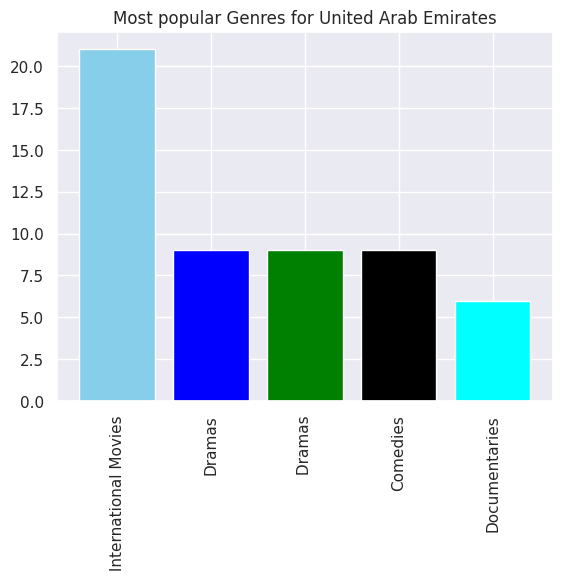

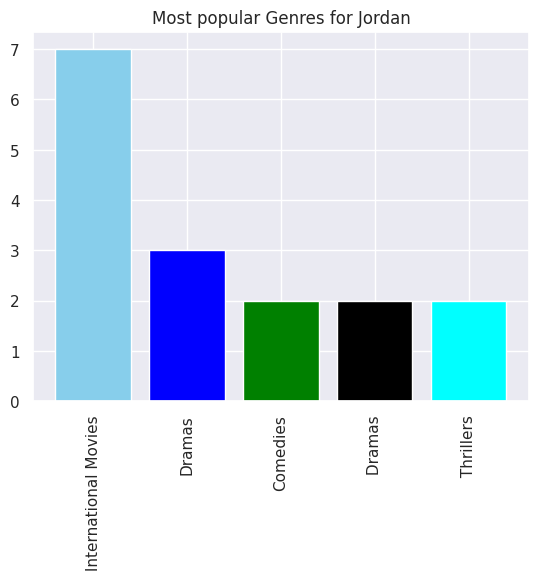

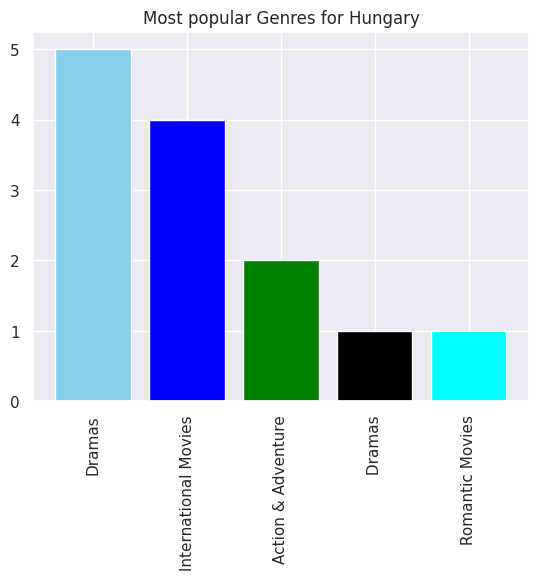

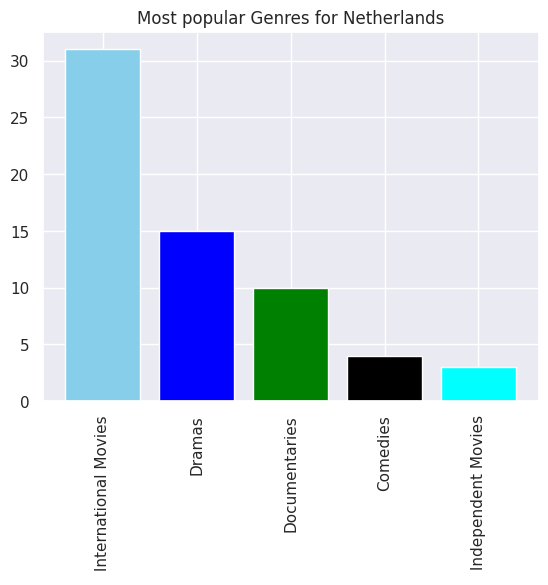

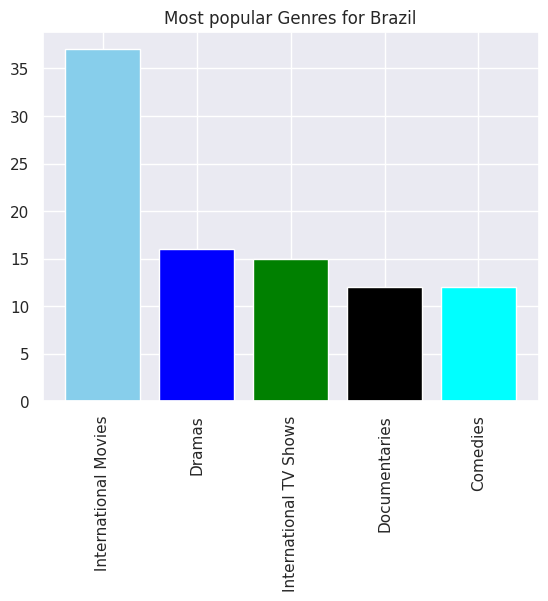

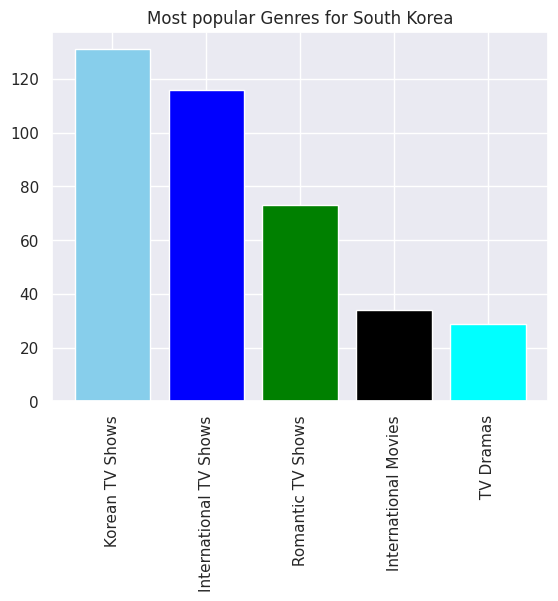

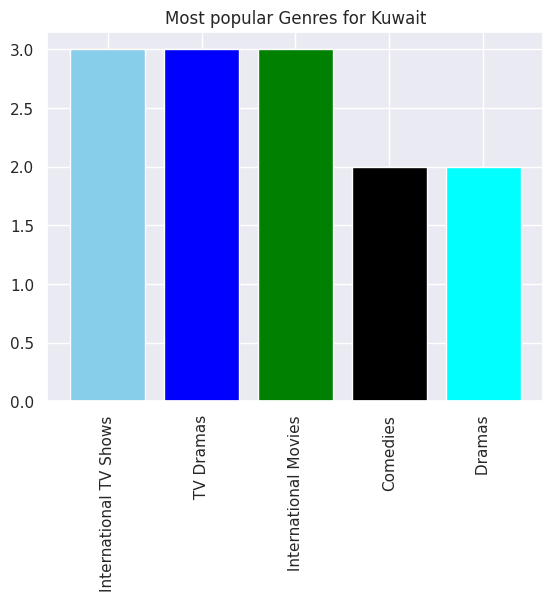

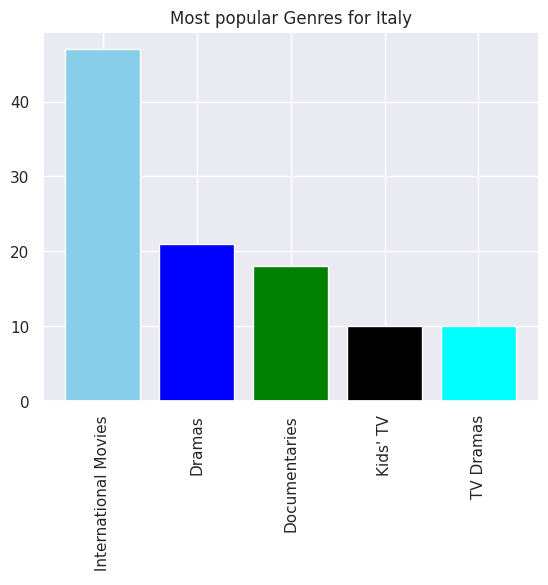

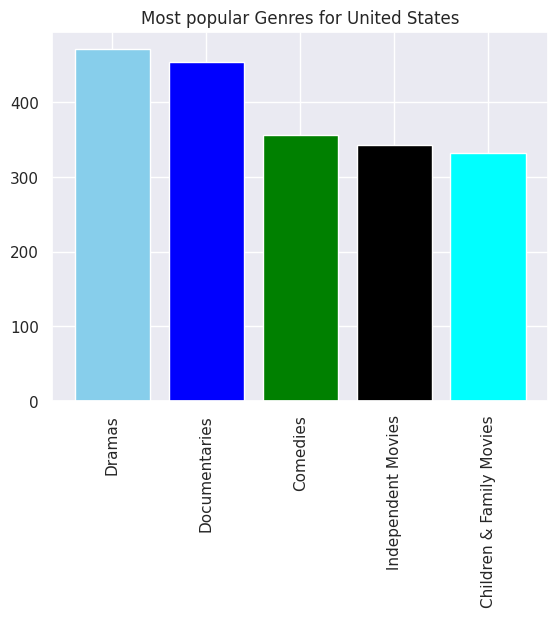

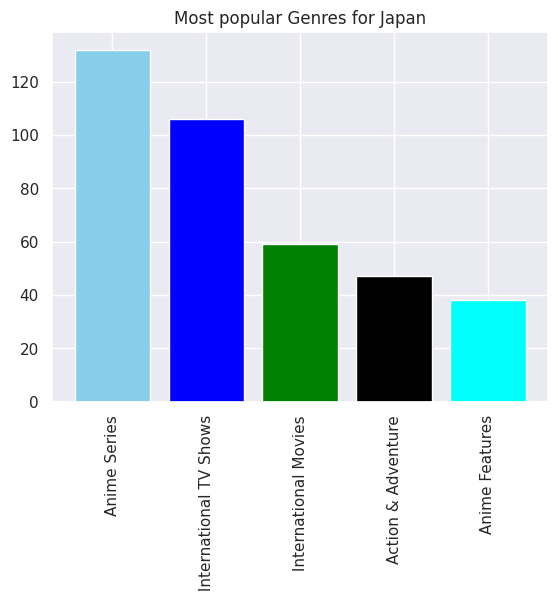

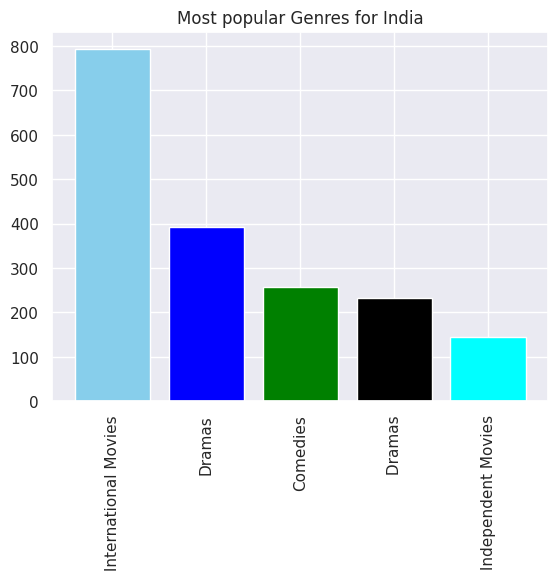

In [40]:
# plotting most popular genres for some of the countries

from collections import Counter
countries = ['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China',
             'Colombia', 'Croatia','Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia', 'Bahamas', 'Bangladesh', 'Bermuda',
             'Botswana', 'Bulgaria', 'Cambodia', 'Cayman Islands','Hong Kong', 'Ireland', 'Thailand', 'Russia', 'Not known',
             'United Arab Emirates', 'Jordan', 'Hungary', 'Netherlands', 'Brazil', 'South Korea', 'Kuwait', 'Italy', 'United States', 'Japan', 'India']
for country in countries:
  genre_country(country)

Conclusion:
* In this graph we can see that Argentina most likes movies, then drama, then TV shows, and so on. As related to Australia, they like international movies, family movies, dramas, and so on.

#Handling Outliers

<Axes: >

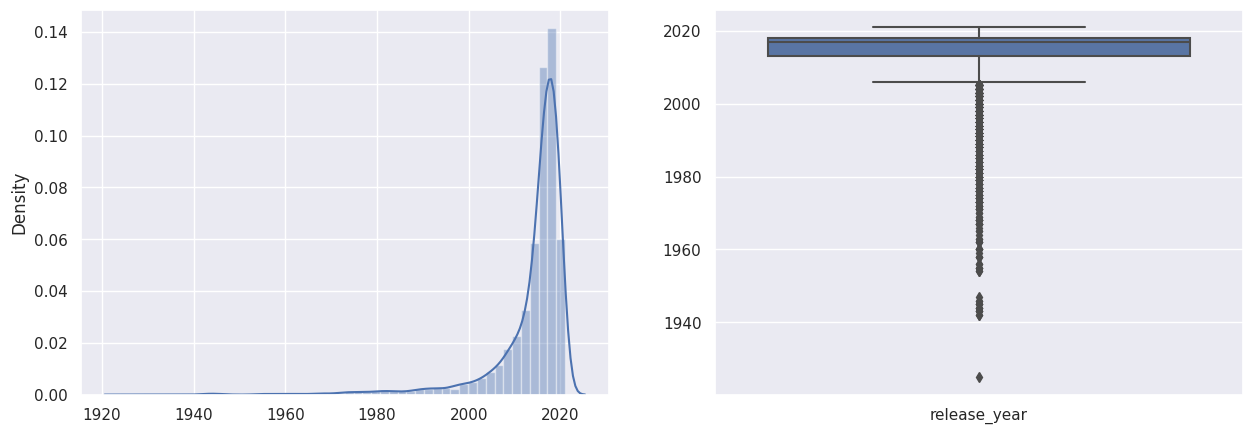

In [31]:
# Handling Outliers & Outlier treatments

# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x=df['release_year'], ax=ax[0])
sns.boxplot(data=df, ax=ax[1])


Handling Outliers
* Except for the release year, almost all of the data are presented in text format.
* The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

# Handling Missing Values

* The "empty string" can be used to replace the missing values in the director, cast, and country attributes.
* There is a small percentage of null values in the rating and date_added columns.Eliminating these nan values will have little effect on the model's construction. As a result, the nan value in the rating and date_added columns is simply removed.

In [32]:
# Handling Missing Values & Missing Value Imputation
df[['director','cast','country']] = df[['director','cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)

In [33]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

Textual data preprocessing is the process of preparing text data for analysis or modeling. It includes a series of steps that are applied to raw text data in order to clean, organize and standardize it so that it can be easily analyzed or used as input for natural language processing or machine learning models.

Modeling Approach
* Choose the attributes that you want to cluster.
* Text Preprocessing: Change all textual data to lowercase and eliminate all punctuation marks and stopwords. Removing commonly occurring words such as "the", "and", "a", etc. that don't carry much meaning.
* Stemming or Lemmatization: Normalizing the words by reducing them to their base form.
* Tokenization: Breaking the text into smaller units, such as sentences or words.
* Dimensionality reduction.
* Make use of various algorithms to cluster the movies and various techniques to determine the optimal number of clusters.
* Build the optimal number of clusters and use wordclouds to display the contents of each cluster.

In [34]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [35]:
path = '/content/drive/MyDrive/capstone project - 4 (unsupervised)/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [36]:
data = pd.read_csv(path)

In [37]:
data.fillna('',inplace = True)

In [38]:
# Combining all the clustering attributes into a single column
data['clustering_attributes'] = (data['director'] + ' ' + data['cast'] +' ' + data['country'] +' ' + data['listed_in'] + ' ' + data['description'])

In [39]:
data['clustering_attributes'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies, International Movies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

##Removing non-ASCII characters

In [41]:
import re

def remove_non_ascii(text):
    """
    Function to remove non-ASCII characters from a string.

    Args:
        text: A string containing text that may include non-ASCII characters.

    Returns:
        A new string where any non-ASCII characters have been removed.

    """
    return re.sub(r'[^\x00-\x7F]+', '', text)

# Applying the remove_non_ascii function to the clustering_attributes column of the data DataFrame
data['clustering_attributes'] = data['clustering_attributes'].apply(remove_non_ascii)


#### 1. Expand Contraction

In [42]:
pip install contractions --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.4 MB/s eta 0:00:00


In [43]:
import contractions

# Applying the contractions.fix() function to the clustering_attributes column of the data DataFrame
# This function replaces common contractions (e.g., "can't" => "cannot") with their expanded forms.

data['clustering_attributes'] = data['clustering_attributes'].apply(lambda x : contractions.fix(x))

#### 2. Lower Casing

In [44]:
# Lower Casing
data['clustering_attributes'] = data['clustering_attributes'].apply(lambda x : x.lower())

#### 3. Removing Punctuations

In [45]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation using string.punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)


In [46]:
# applying the remove_punctuation function to the clustering_attributes column
data['clustering_attributes'] = data['clustering_attributes'].apply(remove_punctuation)

#### 4. Removing URLs & Removing words and digits contain digits.

In [47]:
# Remove URLs & Remove words and digits contain digits
def remove_digits_urls(text):
    '''a function for removing digits and URLs from text'''
    # remove digits
    text = re.sub(r'\d+', '', text)
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    # return text without digits and URLs
    return text

In [48]:
# applying the remove_digits_urls function to the clustering_attributes column
data['clustering_attributes'] = data['clustering_attributes'].apply(remove_digits_urls)

#### 5. Removing Stopwords & Removing White spaces

In [49]:
# Remove Stopwords
# Defining the stop words to remove
stop_words = set(stopwords.words('english'))

# Defining a function to remove stop words from a given text
def remove_stopwords(text):
  # Splitting the text into individual words
    words = text.split()
    # Filtering out the stop words from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Joining the filtered words back into a single string
    return ' '.join(filtered_words)

# Applying the remove_stopwords function to a column of text data
data['clustering_attributes'] = data['clustering_attributes'].apply(remove_stopwords)

In [50]:
# Remove White spaces
#def remove_whitespace(text):
#    """Remove all white space from a text"""
#    return text.replace(" ", "")
#applying the remove_whitespace function to the clustering_attributes column
#data['clustering_attributes'] = data['clustering_attributes'].apply(remove_whitespace)

#### 7. Tokenization

In [51]:
data['clustering_attributes'][40]

'muharrem glmez erdem yener ayhan ta emin olcay muharrem glmez elif nur kerkk tark papuuolu suzan aksoy doa konakolu esin eden deniz zerman turkey comedies international movies slacker owner public bath house rallies community save big developer comes town close open new mall'

In [52]:
# Tokenization
# Create an instance of the TweetTokenizer class
tokenizer = TweetTokenizer()
#Applying Tolenization
data['clustering_attributes'] = data['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

#### 8. Text Normalization

In [53]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
lemmatizer = WordNetLemmatizer()
# Defining a function to lemmatize each token
def lemmatize_tokens(tokens):
    lem = WordNetLemmatizer()
    return [lem.lemmatize(token) for token in tokens]

#Applying Lemmitization
data['clustering_attributes'] = data['clustering_attributes'].apply(lemmatize_tokens)

##### Which text normalization technique have you used and why?
I have used lemmatization as the text normalization technique because it reduces words to their base form, which can help with text analysis and understanding. It also helps to avoid duplication of words with different inflections, and makes it easier to perform analysis on the text. Additionally, lemmatization is more accurate than stemming as it uses a dictionary-based approach to identify the correct base form of a word.

In [54]:
# Extracting the column of text data to be used for clustering
clustering_data = data['clustering_attributes']

In [55]:
data['clustering_attributes']

0       [joo, miguel, bianca, comparato, michel, gomes...
1       [jorge, michel, grau, demin, bichir, hctor, bo...
2       [gilbert, chan, tedd, chan, stella, chung, hen...
3       [shane, acker, elijah, wood, john, c, reilly, ...
4       [robert, luketic, jim, sturgess, kevin, spacey...
                              ...                        
7782    [josef, fare, imad, creidi, antoinette, turk, ...
7783    [mozez, singh, vicky, kaushal, sarahjane, dia,...
7784    [nasty, c, documentary, international, movie, ...
7785    [adriano, zumbo, rachel, khoo, australia, inte...
7786    [sam, dunn, united, kingdom, canada, united, s...
Name: clustering_attributes, Length: 7787, dtype: object

In [56]:
type(clustering_data)

pandas.core.series.Series

In [57]:
# Converting the Pandas Series to a list of strings
doc_list = clustering_data.tolist()

#### 10. Text Vectorization

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert each list of strings in the Pandas Series to a single string
documents = [' '.join(strings) for strings in clustering_data]

# Create a TfidfVectorizer object with desired parameters
tfidf = TfidfVectorizer(stop_words='english', lowercase=False,max_features = 20000)

# Use fit_transform() method to transform the list of strings to a TF-IDF feature matrix
X = tfidf.fit_transform(documents)

# Print the vocabulary and TF-IDF vectors for each document
print("Vocabulary: ", tfidf.vocabulary_)
print(X.toarray())

Vocabulary:  {'joo': 8826, 'miguel': 11719, 'bianca': 1821, 'comparato': 3643, 'michel': 11693, 'gomes': 6756, 'rodolfo': 15155, 'oliveira': 12965, 'rafael': 14291, 'lozano': 10602, 'porto': 13912, 'mel': 11580, 'sergio': 16151, 'zez': 19940, 'celso': 2943, 'brazil': 2257, 'international': 8189, 'tv': 18462, 'drama': 5156, 'scifi': 15934, 'fantasy': 5985, 'future': 6410, 'elite': 5525, 'inhabit': 8108, 'island': 8318, 'paradise': 13269, 'far': 5986, 'crowded': 4068, 'slum': 16669, 'chance': 3034, 'join': 8790, 'saved': 15815, 'jorge': 8841, 'demin': 4553, 'bichir': 1830, 'hctor': 7215, 'bonilla': 2084, 'oscar': 13105, 'serrano': 16162, 'ortiz': 13099, 'carmen': 2791, 'beato': 1624, 'mexico': 11674, 'movie': 12048, 'devastating': 4693, 'earthquake': 5355, 'hit': 7509, 'city': 3396, 'trapped': 18265, 'survivor': 17280, 'walk': 19175, 'life': 10290, 'wait': 19164, 'rescued': 14829, 'trying': 18387, 'desperately': 4653, 'stay': 17002, 'alive': 574, 'gilbert': 6620, 'chan': 3032, 'stella': 

In [59]:
type(X)

scipy.sparse._csr.csr_matrix

In [60]:
X = X.toarray()

In [61]:
type(X)

numpy.ndarray

In [62]:
X.shape

(7787, 20000)

##### Which text vectorization technique have you used and why?
I have used because it is a statistical measure used to evaluate the importance of a word in a document or corpus. The TF-IDF score for a word is proportional to the frequency of the word in the document, but inversely proportional to the frequency of the word in the corpus.It not only captures the frequency of each word in the document but also takes into account the rarity of the word across the corpus.

#Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes dimensionality reduction is needed because it reduces computational complexity and improve the performance of machine learning algorithms also as the number of features or dimensions increases, the amount of data required to adequately represent the data also increases. This can lead to overfitting, a phenomenon known as the curse of dimensionality

In [63]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

In [64]:
# Perform PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

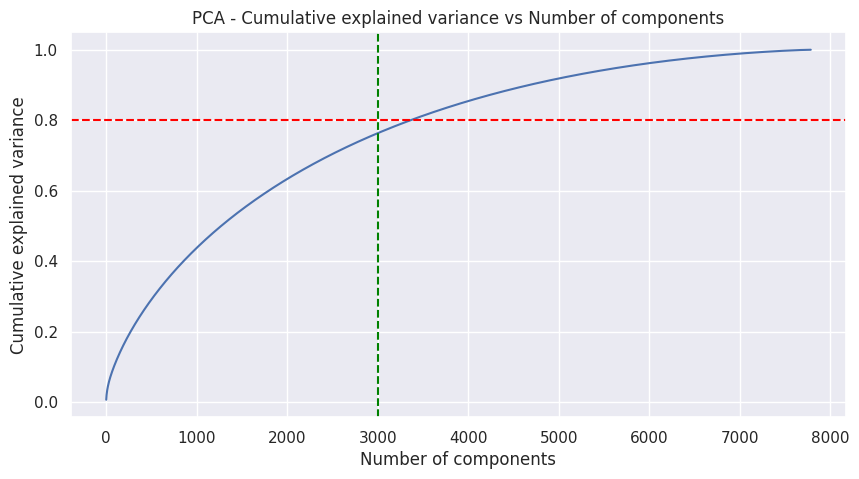

In [65]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

* We discover that approximately 7500 components account for 100 percent of the variance.
* 3000 components alone account for more than 80% of the variance.
* Therefore, we can take the top 3000 components to reduce dimensionality and simplify the model while still being able to capture more than 80% of the variance.

In [68]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(X)


PCA(n_components=3000, random_state=42)

In [70]:
# transformed features
X = pca.transform(X)

# shape of transformed vectors
X.shape

(7787, 3000)

## ***ML Model Implementation***

### ML Model - 1

**K MEANS CLUSTERING**

* K-means clustering is a popular unsupervised machine learning technique used to group similar data points together. The goal of k-means clustering is to partition a dataset into k clusters, where each cluster contains similar data points and is represented by its centroid.
* The k-means algorithm works by first randomly selecting k centroids, one for each cluster. Then, it assigns each data point to the cluster whose centroid is closest to it. This process is repeated until the assignment of data points to clusters no longer changes, or until a maximum number of iterations is reached.

In [69]:
# Importing necessary libraries
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, AffinityPropagation, estimate_bandwidth, MeanShift, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

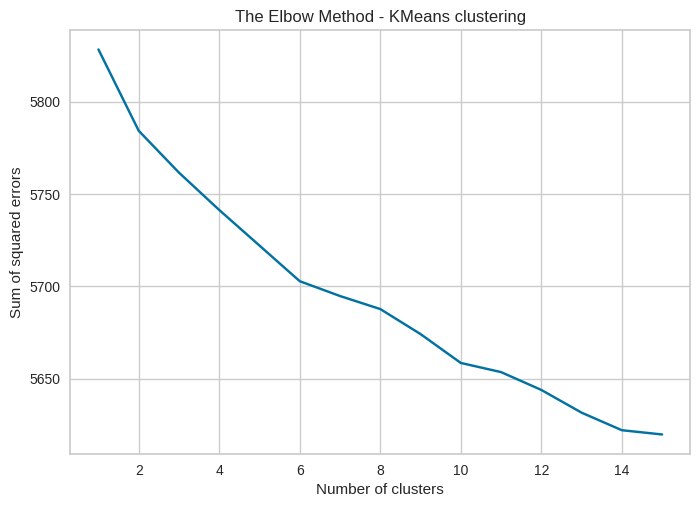

In [71]:
'''Elbow method to find the optimal value of K'''

# Initialize a list to store the sum of squared errors for each value of K
SSE = []

for k in range(1, 16):
  # Initialize the k-means model with the current value of K
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1, 16), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

* The sum of squared distance between each point and the centroid in a cluster decreases with the increase in the number of clusters.

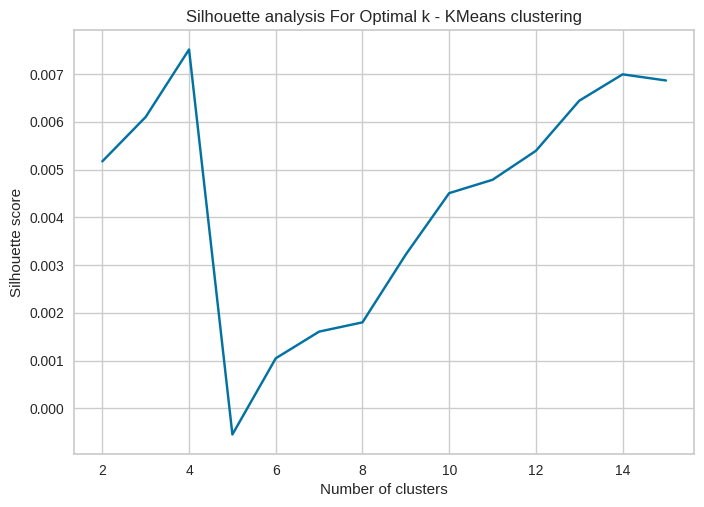

In [72]:
'''Silhouette score method to find the optimal value of k'''

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)

# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [73]:
# Clustering the data into 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=33)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=33)

In [74]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(5741.335638223324, -0.0021410000568402917)


In [76]:
# Adding a kmeans cluster number attribute
data['kmeans_cluster'] = kmeans.labels_

In [78]:
data.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]


type                                              title  \
6529  TV Show                               The Kindness Diaries   
4795    Movie                           Patron Mutlu Son Istiyor   
4990    Movie  Prosecuting Evil: The Extraordinary World of B...   
264     Movie                                             Aadu 2   
4164    Movie                                       Mohenjo Daro   

                  director                                               cast  \
6529                                                          Leon Logothetis   
4795        Kıvanç Baruönü  Tolga Çevik, Ezgi Mola, Murat Başoğlu, Erkan C...   
4990          Barry Avrich                                        Ben Ferencz   
264   Midhun Manuel Thomas  Jayasurya, Vinayakan, Sunny Wayne, Vijay Babu,...   
4164    Ashutosh Gowariker  Hrithik Roshan, Sonakshi Sinha, Pooja Hegde, K...   

     country rating                                         listed_in  \
6529          TV-PG                                        Reality TV   
4795  Turkey  TV-MA   Comedies, International Movies, Romantic Movies   
4990  Canada  TV-MA                                     Documentaries   
264    India  TV-MA                    Comedies, International Movies   
4164   India  TV-14  Action & Adventure, Dramas, International Movies   

                                            description  kmeans_cluster  
6529  Host Leon Logothetis travels the world with on...               3  
4795  Sent to a remote village to write a screenplay...               1  
4990  A gripping profile of Ben Ferencz, the last su...               0  
264   When Shaji Pappan and his gang of goofy outlaw...               1  
4164  A courageous villager moves to the ancient cit...               1

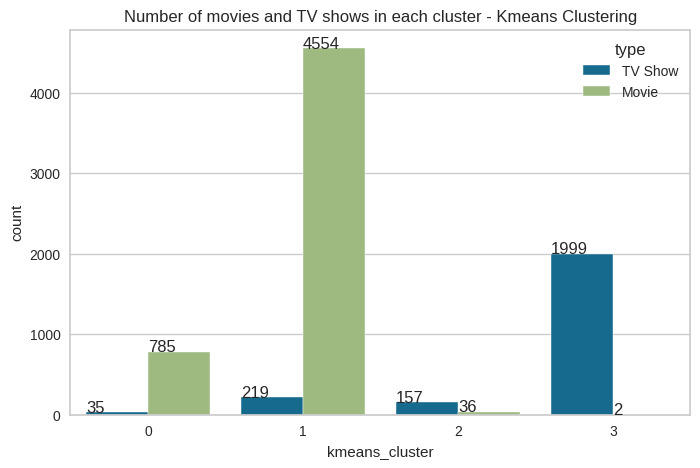

In [80]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='kmeans_cluster',data=data, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

* Successfully built 4 clusters using the k-means clustering algorithm.

### Building wordclouds for different clusters in K-Means Clustering

In [81]:
def kmeans_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  data_wordcloud = data[['kmeans_cluster',column_name]].dropna()
  data_wordcloud = data_wordcloud[data_wordcloud['kmeans_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in data_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

### Word Cloud on "description" column for different cluster

cluster 0


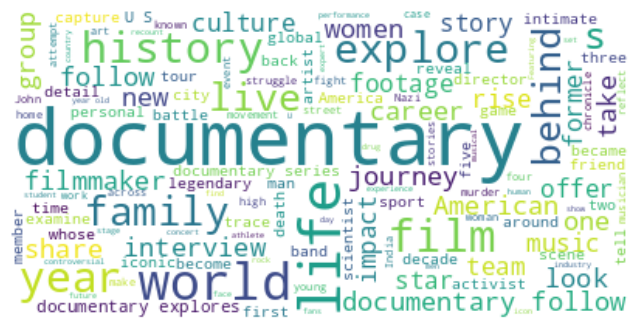

cluster 1


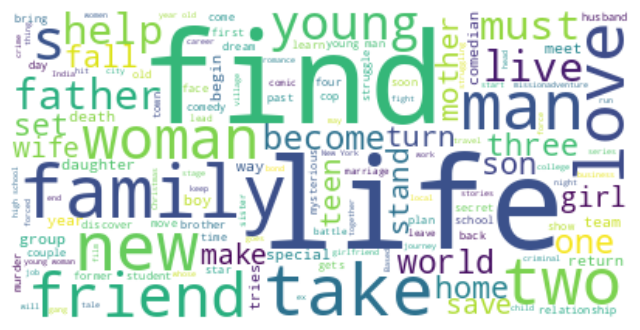

cluster 2


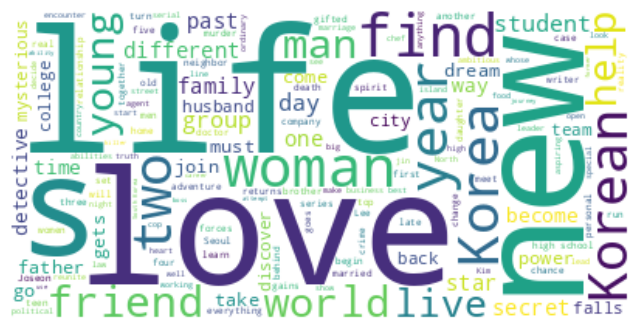

cluster 3


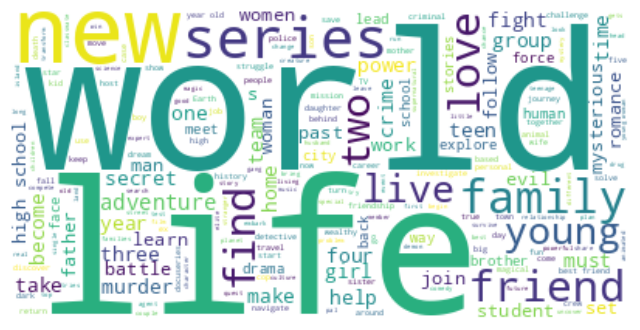

In [83]:
for i in range(4):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'description')

### Word Cloud on "cast" column for different cluster

cluster 0


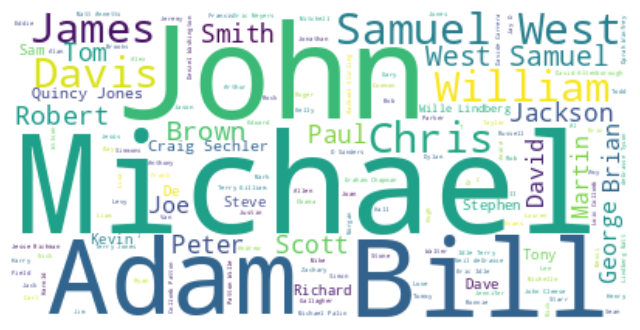

cluster 1


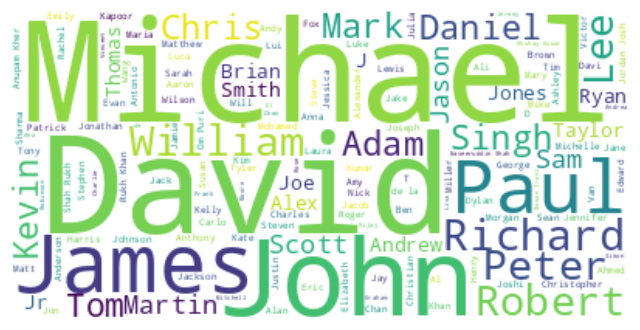

cluster 2


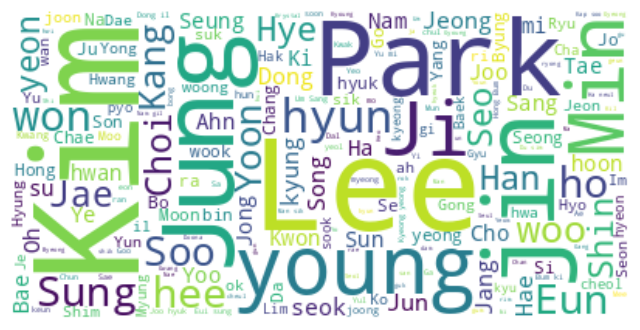

cluster 3


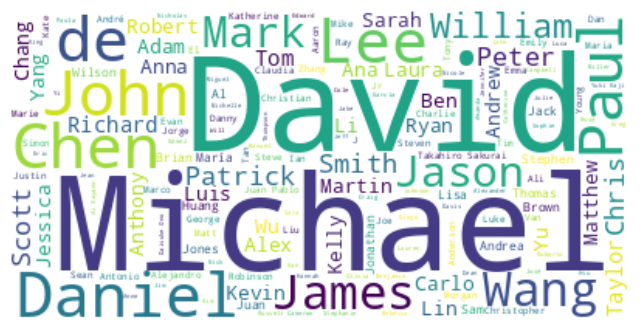

In [84]:
for i in range(4):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'cast')

### Word Cloud on "director" column for different cluster

cluster 0


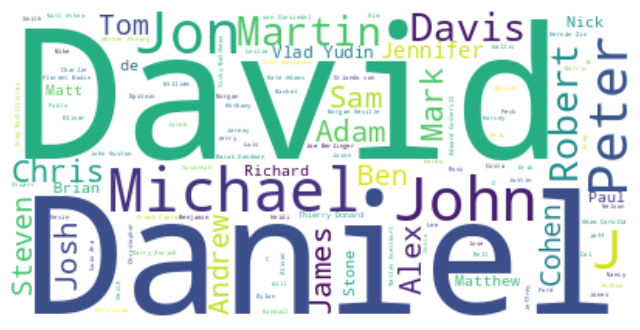

cluster 1


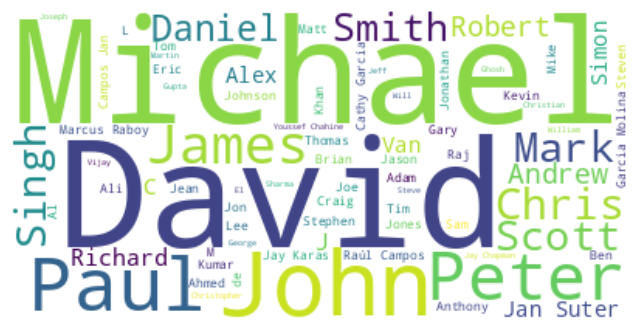

cluster 2


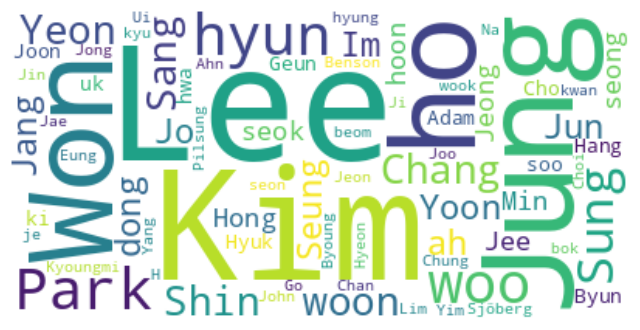

cluster 3


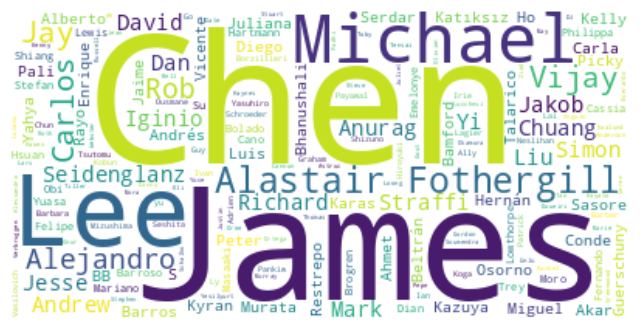

In [85]:
for i in range(4):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'director')

### Word Cloud on "listed_in" (genre) col for different cluster

cluster 0


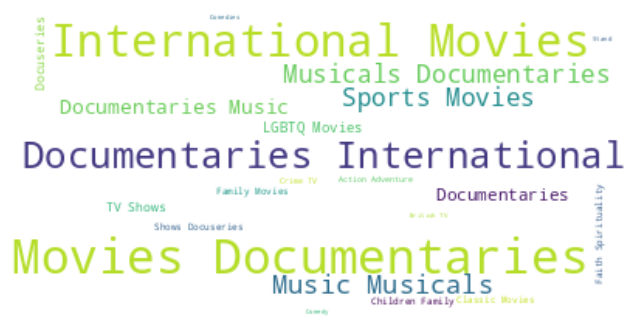

cluster 1


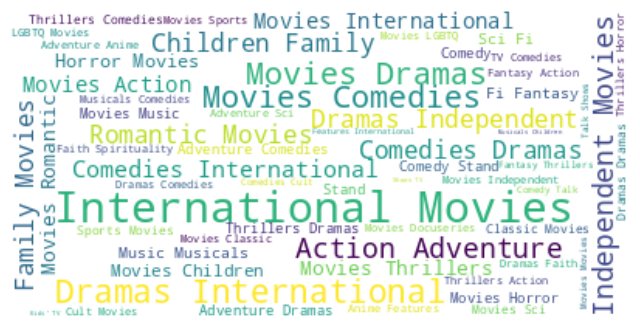

cluster 2


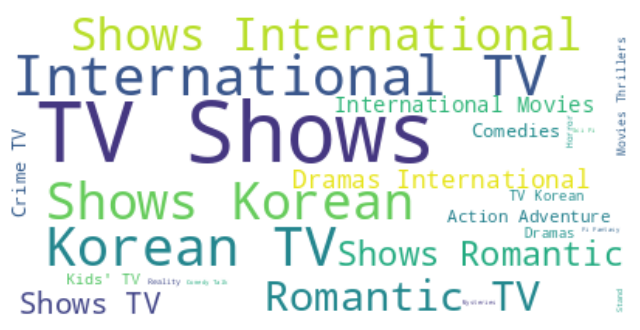

cluster 3


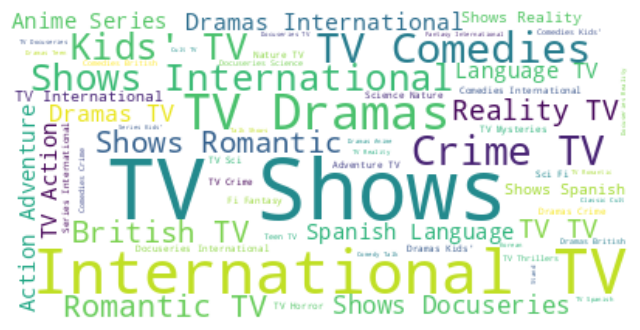

In [86]:

for i in range(4):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'listed_in')

### Word Cloud on "country" column column for different cluster

cluster 0


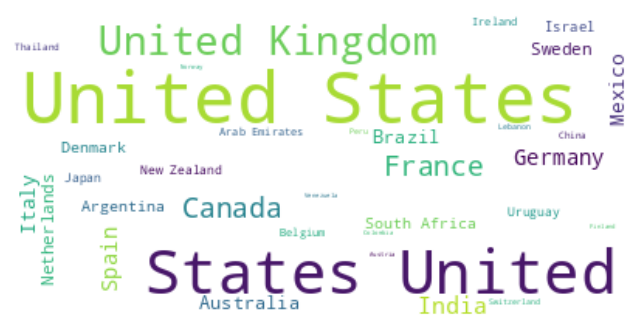

cluster 1


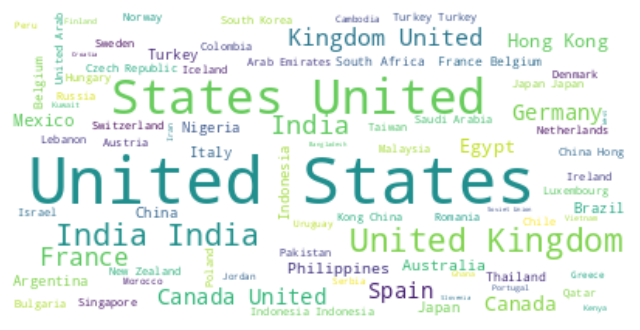

cluster 2


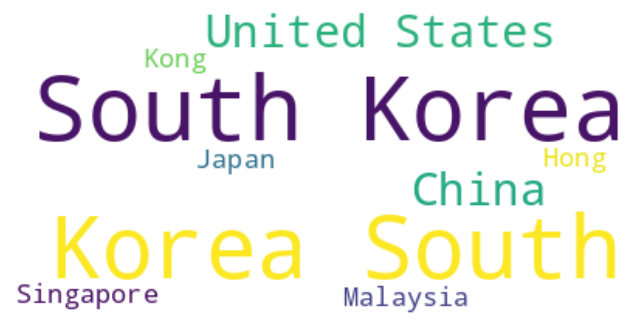

cluster 3


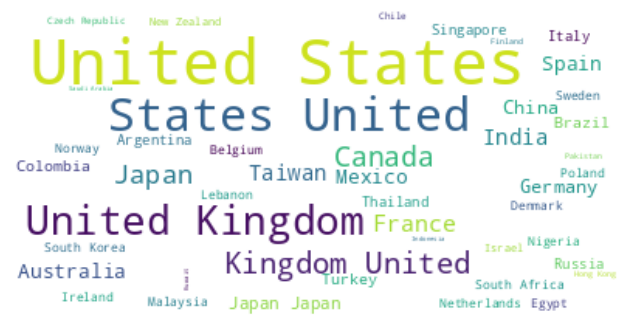

In [87]:
for i in range(4):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'country')

### Word Cloud on "title" column column for different cluster

cluster 0


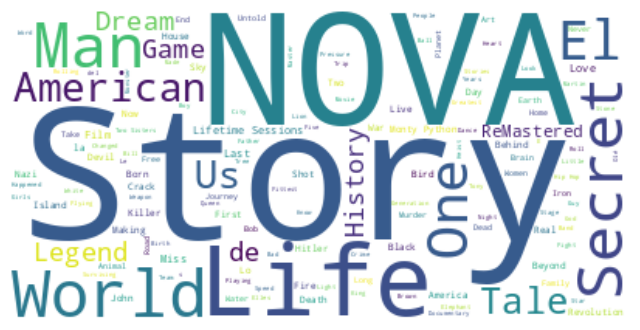

cluster 1


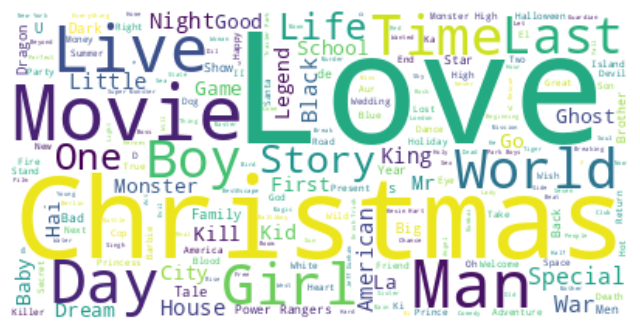

cluster 2


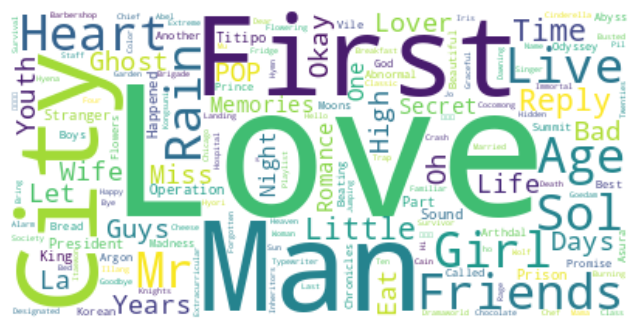

cluster 3


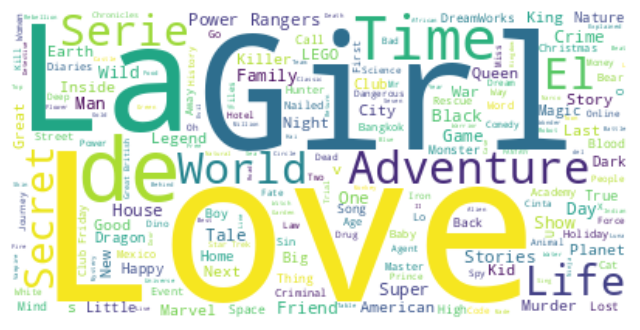

In [88]:

for i in range(4):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'title')

# **Conclusion**

* Around 69% content available on Netflix are Movie and 31% are TV Shows.
* Netflix Contains more Movies and Shows that have rating "TV-MA" followed by "TV-14".
* from 2010 to 2019 netflix has shown tremendous increase in number of shows i.e 1 show in 2010 to 2153 show in 2019.
* From 2001 to 2018, the number of shows released by Netflix increased every year. However, in 2019 and 2020, there was a slight decline, which is likely due to the impact of COVID-19. As we know, there were lockdowns across the globe during that time.
* The top three months in a calendar year during which the most number of shows are added to the platform are December, followed by October, and then January.
* Majority of content available on the popular streaming platform Netflix is produced in the United States, followed by content produced in India and the United Kingdom.
* Majority of content available on Netflix is suitable for adult audiences, followed by teenagers, older kids, and kids.
* Drama is the most popular genre of content available on Netflix, followed by comedies and documentaries. Action and adventure are also popular genres, with many of the platform's most-watched shows and movies falling under this category.
* Grey's Anatomy has most number of seasons i.e 16 seasons in TV Shows category while Supernatural & NCIS have equal number of seasons i.e 15 seasons.
* The histogram of duration for movies is approximately symmetric or slightly skewed to the right. This means that the distribution of movie durations is relatively balanced, with a slight tendency towards longer movies.
* In overall category including content from all countries top three directors are Raul Campos and Jan Suter, Marcus Raboy, and Jay Karas.
* Overall Alastair Fothergill is the top director of TV shows on Netflix.
* Top 3 directors of movies i.e., "Raul Campos, Jan Suter", "Marcus Raboy", and "Jay Karas" create content that is mostly suitable for adult audiences.One Popular indian director "David Dhawan" made content that are suitable for teens.
* Top 3 movie directors, Raul Campos, Jan Suter, Marcus Raboy, and Jay Karas, create content that is mostly related to stand-up comedy.
* The average length of movies has seen an upward trend till around the year 1965, after which there has been a decline. This insight can help streaming platforms like Netflix in making informed decisions related to the content they acquire and produce.
* David Dhawan is most popular director in india follwed by Anurag Kashyap.
* Jay karas and Marcus Raboy are two most popular director in USA.
* Anupam Kher is top actor in india.
* Adam Sandler and Samuel L.Jackson are two most popular actor in USA.
* Nizar Shafi,Patrick Graham,Soumendra Padhi,Sudha Kongara and Vignesh Shivam are among top TV Shows director in india.
* Radhika Apte,Manav Kaul,Rahman,Havish are among top TV Shows actor in india.
* Stan Lathan and Rob Seidenglanz are two top TV Shows director in USA.
* Dave Chappelle and Keiynan Lonsdale are two top TV Shows actor in USA.
* Features that are used to make clusters are director,cast,country,genres and description.
* Text vectorization is done using term frequency-inverse document frequency (tf-idf) results in a sparse matrix of shape 7777 rows by 20000 columns, where each row corresponds to a document in the corpus and each column corresponds to a unique term in the vocabulary.
* To reduce the dimensionality of the high-dimensional data represented by a sparse matrix of shape 7777 by 20000, principal component analysis (PCA) was applied while retaining 80% of the variance in the data. This resulted in a reduced feature space of 3500 dimensions, which captures the most important patterns and structures in the original data.
* For K means clustering after applying clustering techniques such as silhouette score and elbow method to the text data, it was determined that the optimal number of clusters for the data is 22. To visualize the clustering results, a bar chart was created to show the distribution of documents among the 22 clusters. Moreover, word clouds were generated for each cluster to highlight the most frequent terms that appear in the documents within each cluster.
* In agglomerative clustering, a distance threshold of 3.9 was chosen to form 12 clusters from the text data. Each cluster was visualized through a bar chart displaying the number of documents in each cluster and word clouds that represent the most common terms used in the documents within each cluster.
* Finally a content-based recommender system was built using cosine similarity. A function was created that takes a movie name as input and recommends similar movies based on their similarity scores with the input movie.The similarity scores were computed using cosine similarity between the vectorized representations of the movie plots.The recommended movies are those with the highest similarity scores to the input movie.

# **Conclusion:-**



#Conclusion : - ML model
In conclusion, a machine learning model for predicting Bank Marketing Effective Prediction can be developed using various algorithms such as logestic regression, random forest and XG Boost. The model's performance can be evaluated using metrics such as Test auc and Test Accuracy.It is also important to note that the model should be regularly retrained and updated with new data to ensure its continued performance.

* The top-performing models in terms of accuracy and AUCare the random forest and XGBoost models, with identical scores for all metrics. This suggests that these models are equally good at predicting the target variable.

* The logistic regression had lower scores than the other models for all metrics, suggesting that they may not be as effective at predicting the target variable.

* Overall, the random forest and  XGBoost are the most effective models for predicting the target variable based on the evaluation metrics provided. However, it's important to note that other factors, such as model interpretability and computational complexity, may also be important considerations in choosing the best model for a specific task.


#Conclusion :- EDA

* It was a great learning experience working on a financial dataset.
Our dataset consist of categorical and numerical features.

* We have 16 independent features, out of these only half of them are important.
'duration' is the most important feature while 'loan' is the least important feature.

* Month of May have seen the highest number of clients contacted but have the least success rate. Highest success rate is observed for end month of the financial year as well as the calendar year. So one can say that our dataset have some kind of seasonality.

* When visualized age in groups, it is found that clients with age less than 30 and greater than 60 are less contacted through the campaign but have a higher success rate.

* More campaign lead to a more positive impact on the deposit of an account.

* Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'.

* Very few clients are contacted who are defaulter,
